<a href="https://colab.research.google.com/github/KeyMoney22/Plant_disease_classification-/blob/modifications/tomato_disease_detection_improved_COPY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TOMATO DISEASE DETECTION MODEL USING DEEP LEARNING**

# **INTRODUCTION**

Tomatoes are one of the most important crops in Kenya, both economically and nutritionally. They are a staple in the diet of many Kenyans and a significant source of income for smallholder farmers. However, tomato production in Kenya faces numerous challenges, among which diseases are the most important. Tomato plants are susceptible to various diseases caused by fungi, bacteria, viruses, and pests. These diseases can lead to substantial yield losses, reduced produce quality, and increased production costs due to the need for pesticides and other control measures.

In Kenya, the impact of tomato diseases is exacerbated by several factors:

1. Limited Access to Knowledge and Resources: Many smallholder farmers lack access to information on disease identification and management practices.
2. Extension services are often inadequate, leaving farmers without the necessary support to effectively combat tomato diseases.

3. Climate and Environmental Conditions: Kenya's diverse climate and environmental conditions can create favorable conditions for the spread and persistence of various tomato diseases. Changes in weather patterns due to climate change further complicate disease management.

4. Economic Constraints: The financial constraints of smallholder farmers limit their ability to invest in disease management solutions such as resistant seed varieties, appropriate chemicals, and modern farming techniques.

5. Inadequate Diagnostic Tools: Traditional methods of disease diagnosis are often slow, inaccurate, and labor-intensive. There is a need for rapid, accurate, and cost-effective diagnostic tools that can be easily used by farmers in the field.


The consequences of unchecked tomato diseases are severe. Yield losses can range from 20% to 100%, depending on the type and severity of the disease. This not only affects the income of farmers but also threatens food security and nutrition for millions of Kenyans. Addressing tomato diseases effectively is therefore crucial for enhancing agricultural productivity, improving the livelihoods of smallholder farmers, and ensuring food security in Kenya.


# **PROBLEM STATEMENT**

Tomato diseases cause significant yield losses and economic challenges for Kenyan farmers. Traditional disease detection methods are inadequate for timely and accurate diagnosis. There is a need for a rapid, accurate, and user-friendly disease detection tool that can be used directly in the field.

# **DATA UNDERSTANDING**

Our dataset was downloaded from a Kaggle repository authored by Plant Village.

PlantVillage is an organization hosted by Penn State University, is a research initiative focused on enhancing agricultural resilience and sustainability, particularly in the context of climate change. The platform employs advanced technologies such as artificial intelligence and data analytics to address various agricultural challenges including plant disease, which will be the focus of this project.
For this project we shall focus on Tomato Leaves.

The link to the repository is here: https://www.kaggle.com/datasets/emmarex/plantdisease?select=PlantVillage

Dataset Author Website: https://plantvillage.psu.edu/

# **OBJECTIVES**

**MAIN OBJECTIVE**

Develop a deep learning-based model to accurately classify tomato leaf diseases.

**SPECIFIC OBJECTIVES**

i. Data Collection and Preprocessing.Gather and preprocess a diverse dataset of tomato leaf images.

ii. Model Development.Build and train deep learning models for disease classification.

iii. Model Evaluation.Assess the models performance using metrics such as accuracy

iv. Deployment



# **METRICS OF SUCCESS**


Model Accuracy: Achieve a classification accuracy of over 90%.


**IMPORTING THE LIBRARIES**

In [ ]:
# from google.colab import drive
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import os
from PIL import Image
from tensorflow.keras import models, layers
from keras.applications import VGG19
from keras import models
from keras import layers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.callbacks import EarlyStopping
# !pip install EfficientNetB0
# from tensorflow.keras.applications import EfficientNetB0
!pip install efficientnet
import efficientnet.tfkeras as efn
# loading MobileNet V2 Model
from tensorflow.keras.applications import MobileNetV2
#import earlystopping
from tensorflow.keras.callbacks import EarlyStopping #earlystopping
from keras.applications import VGG19
#Recording History in json
import json
!pip install wandb
import wandb
from wandb.integration.keras import WandbCallback
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


# **LOADING THE DATA**

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folder_path='/content/drive/MyDrive/PlantVillage'

Loaded the dataset from a specified directory using 'image_dataset_from_directory' . The images are labeled automatically, converted to categorical labels, and processed in RGB color mode. The images are batched into groups of 32, resized to 256x256 pixels, and shuffled to ensure random ordering.

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(
    folder_path,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True
)

print('The length of our data is', len(data))


Found 16081 files belonging to 10 classes.
The length of our data is 503


In [ ]:
for image_batch, label_batch in data:
    print('Image Batch Shape', image_batch.shape)
    print('Label Batch Shape', label_batch.shape)
    break


Image Batch Shape (32, 256, 256, 3)
Label Batch Shape (32, 10)


In [ ]:
# Get class names
class_names = data.class_names
print('Class names:', class_names)

Class names: ['Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


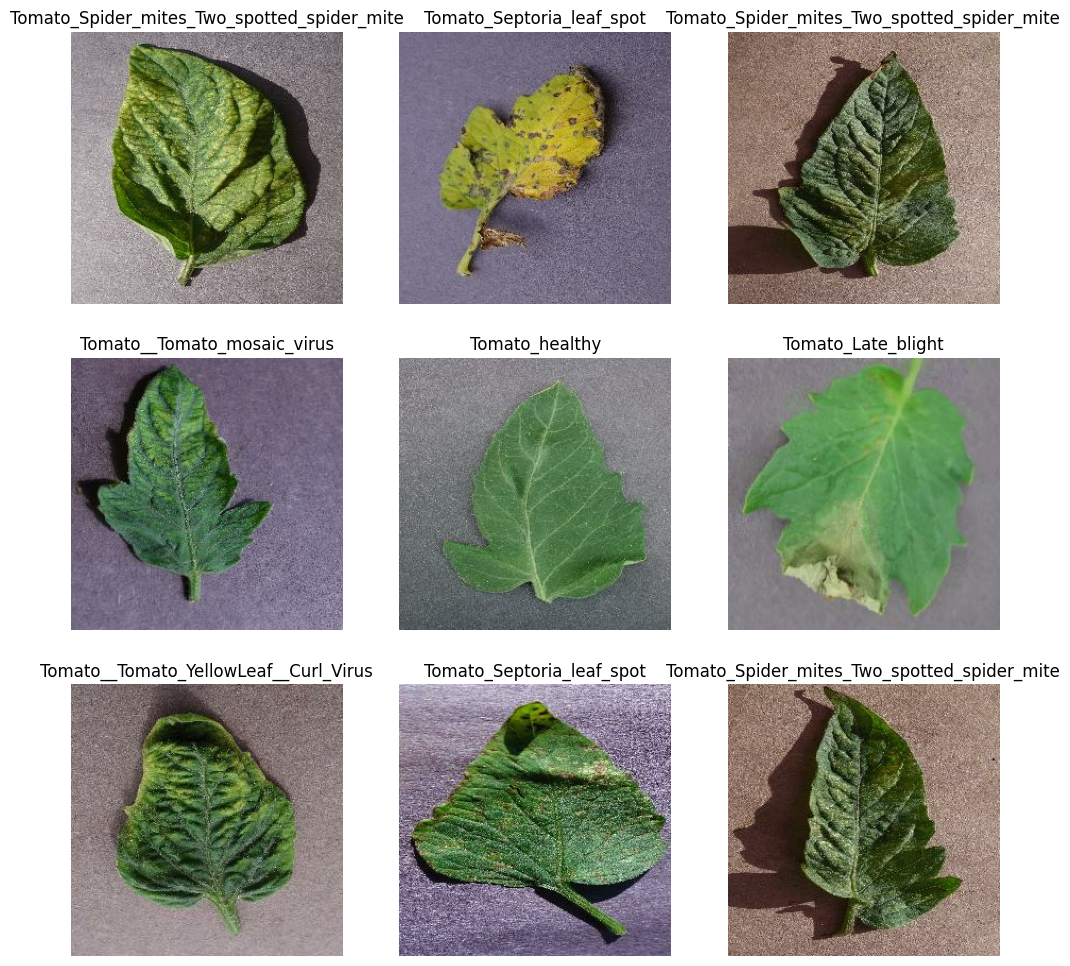

In [ ]:
#preview data
def preview_data(dataset, class_names, num_images=9):
    plt.figure(figsize=(12, 12))
    for images, labels in dataset.take(1):
        for i in range(num_images):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[tf.argmax(labels[i])])
            plt.axis("off")
    plt.show()

preview_data(data, class_names)

The output shows a grid of 9 images, each representing a different tomato leaf affected by various diseases. The titles above each image indicate the specific disease affecting the tomato leaf.

Noted that in some cases, the text labels overlap, making them difficult to read accurately. "Tomato_Spider_mites_Two_spotted_spider_mite" overlaps with the image below it.

Some labels are cut off, making them incomplete. "Tomato_YellowLeaf_Curl_Virus" is missing the word "Tomato" .

# **DATA CLEANING AND PREPARATION**

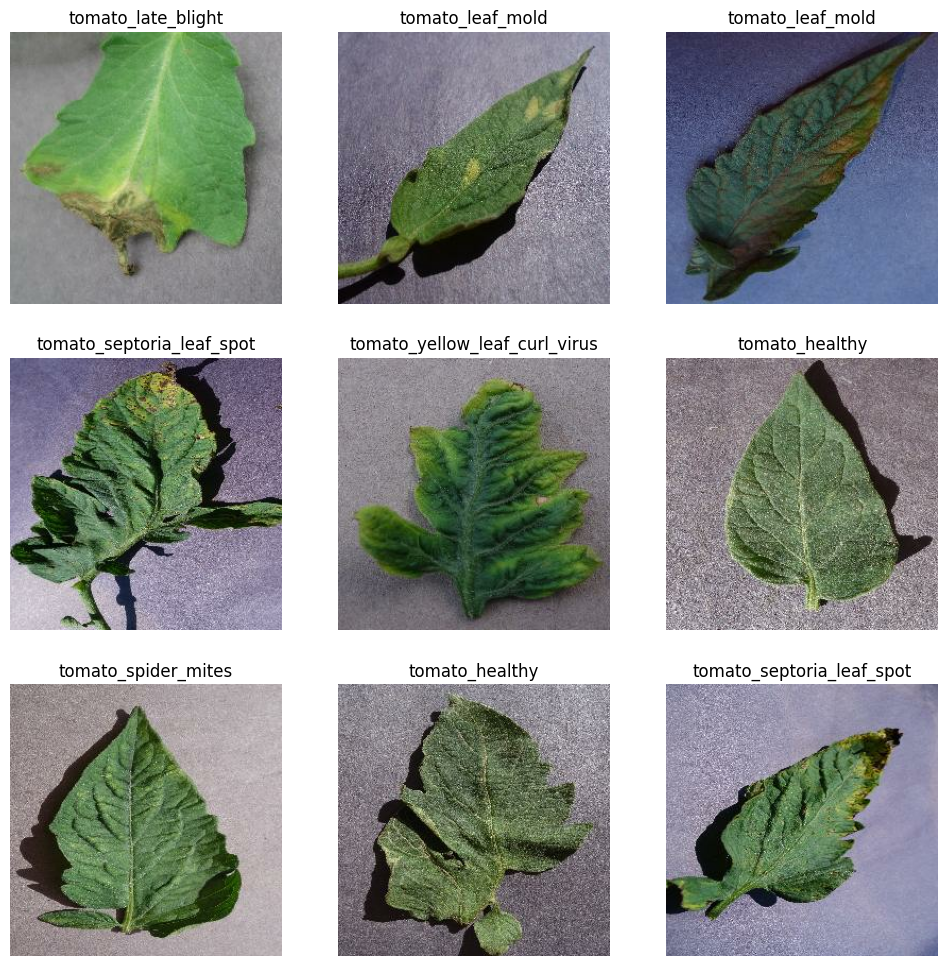

In [ ]:
def clean_class_name(name):
    name = name.replace('__', '_')
    if name == 'Tomato_Spider_mites_Two_spotted_spider_mite':
        name = 'Tomato_Spider_mites'
    elif name == 'Tomato_Tomato_YellowLeaf_Curl_Virus':
        name = 'Tomato_Yellow_Leaf_Curl_Virus'
    elif name == 'Tomato_Tomato_mosaic_virus':
        name = 'Tomato_Mosaic_Virus'
    name = name.lower()
    return name

class_names = [clean_class_name(name) for name in class_names]
preview_data(data, class_names)


The image displays nine image samples with corresponding class labels. The labels are  cleaned and formatted correctly based on the clean_class_name function. The images represent different tomato plant diseases and a healthy tomato leaf.

**Checking For Corrupt Images**

The dataset was checked to find and remove any corrupt images, to ensure the data quality, before any further processing was done.

In [ ]:
def check_corrupt_images(folder_path):
    corrupt_images = []
    for root, _, files in os.walk(folder_path):
        for file in files:
            try:
                img = Image.open(os.path.join(root, file))
                img.verify()  # Verify that it is, in fact, an image
            except (IOError, SyntaxError) as e:
                corrupt_images.append(os.path.join(root, file))
    return corrupt_images

corrupt_images = check_corrupt_images(folder_path)
print(f"Found {len(corrupt_images)} corrupt images.")

Found 0 corrupt images.


In [ ]:
# Removing Corrupt images
for img_path in corrupt_images:
    try:
      os.remove(img_path)
      print(f"Corrupt image removed:{img_path}")
    except OSError:
      pass

On the initial run one corrupt image was found and removed

**Class Distribution**

In [ ]:
 # A function to check class distribution
def check_class_distribution(dataset):
    class_counts = {}
    for images, labels in dataset:
        for label in labels:
            class_name = class_names[tf.argmax(label)]
            if class_name in class_counts:
                class_counts[class_name] += 1
            else:
                class_counts[class_name] = 1
    return class_counts

# Checking class distribution
class_distribution = check_class_distribution(data)

# Sorting the dictionary by values (class counts) in ascending order
sorted_class_distribution = dict(sorted(class_distribution.items(), key=lambda item: item[1]))

print("Sorted class distribution (ascending):", sorted_class_distribution)


Sorted class distribution (ascending): {'tomato_mosaic_virus': 373, 'tomato_leaf_mold': 962, 'tomato_early_blight': 1010, 'tomato_target_spot': 1404, 'tomato_healthy': 1591, 'tomato_spider_mites': 1676, 'tomato_septoria_leaf_spot': 1771, 'tomato_late_blight': 1909, 'tomato_bacterial_spot': 2147, 'tomato_yellow_leaf_curl_virus': 3238}


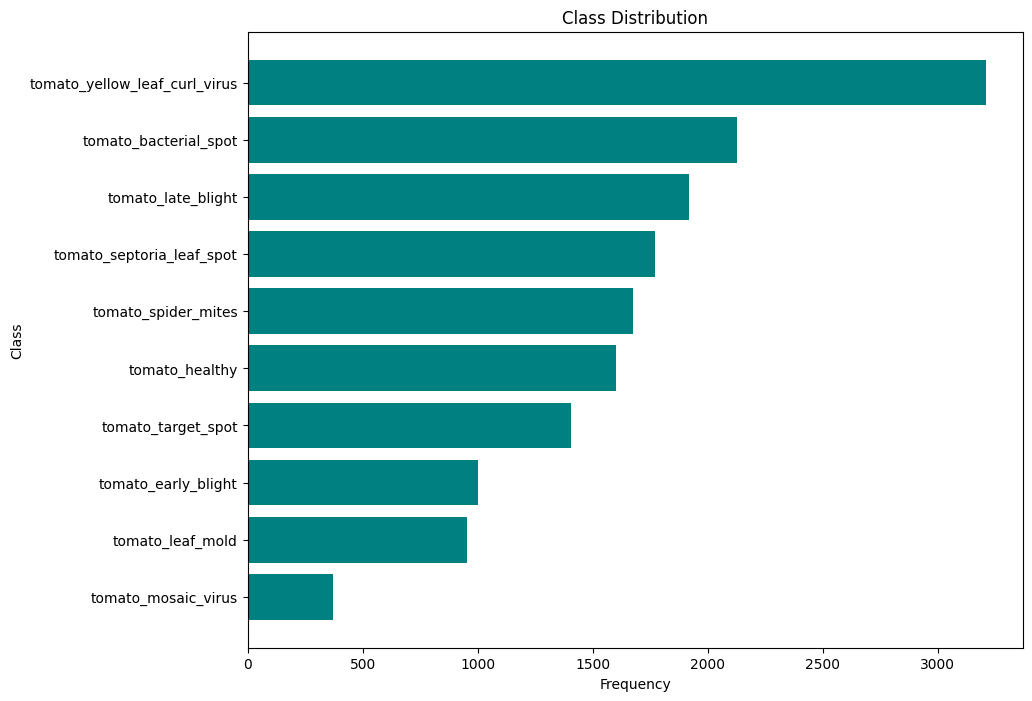

In [ ]:
# Visualize class distribution with a horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(list(sorted_class_distribution.keys()), list(sorted_class_distribution.values()), color='Teal')
plt.title('Class Distribution')
plt.xlabel('Frequency')
plt.ylabel('Class')
plt.show();

The horizontal bar chart shows the distribution of images across different classes in the dataset. Each bar represents a class, and its length corresponds to the frequency or count of images belonging to that class.

tomato_yellow_leaf_curl_virus is the largest class containing 3208 images and tomato_mosaic_virus is the smallest class containing 373 images

# **SPLITTING THE DATASET**

The data is split into training, validation, and test sets with specified ratios (80% train, 10% validation, 10% test), this prepares the data for training and evaluation.

In [ ]:
def split_data(dataset, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    data_size = len(dataset)
    if shuffle:
        dataset = dataset.shuffle(shuffle_size)

    train_size = int(train_split * data_size)
    val_size = int(val_split * data_size)

    train_set = dataset.take(train_size)
    val_set = dataset.skip(train_size).take(val_size)
    test_set = dataset.skip(train_size).skip(val_size)

    return train_set, val_set, test_set

train_set, val_set, test_set = split_data(data)
print(len(train_set))
print(len(val_set))
print(len(test_set))


402
50
51


# **DATA AUGMENTATION**

Data augmentation is applied to the training dataset to improve the model's generalization by randomly flipping images horizontally and vertically and rotating them.

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal_and_vertical'),
    layers.RandomRotation(0.2)
])

def augment(image, label):
    image = data_augmentation(image)
    return image, label

train_set = train_set.map(augment)


# **BUILDING THE MODELS**

A preprocessing step is defined to resize images to 256x256 pixels and rescale pixel values to the range [0, 1].

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(256, 256),
    layers.Rescaling(1.0/255)
])


Early stopping is configured to monitor validation accuracy and stop training if there is no improvement for three consecutive epochs. This helps to prevent overfitting.

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=3,
    restore_best_weights=True
)


**Model 1 : Simple CNN**

A  Convolutional Neural Network (CNN) model is built, consisting of several layers.Convolutional layers with ReLU activation followed by max-pooling layers. Dropout layers to prevent overfitting.Flatten layer to convert the 2D matrix to a 1D vector.Dense layers for the final classification using softmax activation.

In [ ]:
model1 = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(32, 256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(class_names), activation='softmax'),
])

model1.build(input_shape=(32, 256, 256, 3))
model1.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (32, 127, 127, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

The model is trained using the augmented training dataset and validated using the validation dataset until early stopping is triggered.

In [ ]:

model1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history1 = model1.fit(
    train_set,
    batch_size=32,
    validation_data=val_set,
    verbose=1,
    epochs=50,
    callbacks=[early_stopping]
)


Epoch 1/50
400/400 [==============================] - 267s 597ms/step - loss: 1.6290 - accuracy: 0.4216 - val_loss: 1.8321 - val_accuracy: 0.4269
Epoch 2/50
400/400 [==============================] - 261s 588ms/step - loss: 0.8532 - accuracy: 0.6994 - val_loss: 0.9022 - val_accuracy: 0.6812
Epoch 3/50
400/400 [==============================] - 259s 583ms/step - loss: 0.6807 - accuracy: 0.7578 - val_loss: 0.9268 - val_accuracy: 0.6785
Epoch 4/50
400/400 [==============================] - 261s 587ms/step - loss: 0.5429 - accuracy: 0.8090 - val_loss: 0.7828 - val_accuracy: 0.7394
Epoch 5/50
400/400 [==============================] - 256s 579ms/step - loss: 0.4678 - accuracy: 0.8366 - val_loss: 0.6382 - val_accuracy: 0.7806
Epoch 6/50
400/400 [==============================] - 258s 585ms/step - loss: 0.3969 - accuracy: 0.8606 - val_loss: 0.6018 - val_accuracy: 0.8093
Epoch 7/50
400/400 [==============================] - 256s 574ms/step - loss: 0.3819 - accuracy: 0.8670 - val_loss: 0.6636 -

Achieved a training accuracy of 93.20% and a validation accuracy of 87.75%.

The model's performance has improved significantly from the first epoch to the 18th epoch. Initially, both the training and validation losses were high with moderate accuracy, but over time, the training loss decreased and accuracy increased, indicating better model performance and generalization.

In [ ]:
# dumping the history to the json file
with open('history1.json','w') as f:
  json.dump(history1.history,f)

In [ ]:
model1.save('model1_initial.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Model 2 : VGG19**

In [ ]:
cnn_base = VGG19(weights='imagenet',
                 include_top=False,
                 input_shape=(256, 256, 3))
# Define Model Architecture
model2 = models.Sequential()
model2.add(cnn_base)
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))

cnn_base.trainable=False #freeze the base model to prevent the pretrained weights from being updated during training

for layer in model2.layers:
  print(layer.name, layer.trainable)

# check how many trainable weights are in the model
print(len(model2.trainable_weights))

model2.build(input_shape = (32, 256, 256, 3))
model2.summary()

80134624/80134624 [==============================] - 0s 0us/step
vgg19 False
flatten_1 True
dense_2 True
dense_3 True
dense_4 True
dense_5 True
dense_6 True
10
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 8, 8, 512)         20024384  
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_2 (Dense)             (None, 64)                2097216   
                                                                 
 dense_3 (Dense)             (None, 128)               8320      
                                                                 
 dense_4 (Dense)             (None, 256)               33024     
                                                                 
 dense_5 (Dense)          

In [ ]:
model2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history2 = model2.fit(
    train_set,
    batch_size=32,
    validation_data=val_set,
    verbose=1,
    epochs=50,
    callbacks=[early_stopping]
)


Epoch 1/50
400/400 [==============================] - 431s 1s/step - loss: 1.1926 - accuracy: 0.6202 - val_loss: 0.6924 - val_accuracy: 0.7831
Epoch 2/50
400/400 [==============================] - 433s 1s/step - loss: 0.5865 - accuracy: 0.8044 - val_loss: 0.5774 - val_accuracy: 0.8106
Epoch 3/50
400/400 [==============================] - 434s 1s/step - loss: 0.4711 - accuracy: 0.8433 - val_loss: 0.5543 - val_accuracy: 0.8250
Epoch 4/50
400/400 [==============================] - 431s 1s/step - loss: 0.4098 - accuracy: 0.8651 - val_loss: 0.3203 - val_accuracy: 0.8875
Epoch 5/50
400/400 [==============================] - 430s 1s/step - loss: 0.3637 - accuracy: 0.8797 - val_loss: 0.4865 - val_accuracy: 0.8462
Epoch 6/50
400/400 [==============================] - 446s 1s/step - loss: 0.3575 - accuracy: 0.8820 - val_loss: 0.3111 - val_accuracy: 0.8969
Epoch 7/50
400/400 [==============================] - 445s 1s/step - loss: 0.3215 - accuracy: 0.8916 - val_loss: 0.2994 - val_accuracy: 0.8949

Achieved a training accuracy of 90.06% and a validation accuracy of 89%.

The loss and accuracy improved steadily over the epochs, with training loss decreasing and training accuracy increasing, while validation accuracy also improved and reached a high of 89% by the 9th epoch, though there were some fluctuations in validation loss.

In [ ]:
# dumping the history to the json file
with open('history2.json','w') as f:
  json.dump(history2.history,f)

In [ ]:
model2.save('model2_initial.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Model 3:ResNet50**

In [ ]:
resnet50_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
resnet50_base.trainable = False

model3 = models.Sequential([
    resnet50_base,
    layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')  # Adjust output layer size
])

model3.build(input_shape=(32, 256, 256, 3))
model3.summary()


94765736/94765736 [==============================] - 0s 0us/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_4 (Dense)             (None, 256)               524544    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 24114826 (91.99 MB)
Trainable params: 527

In [ ]:
model3.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history3 = model3.fit(
    train_set,
    batch_size=32,
    validation_data=val_set,
    verbose=1,
    epochs=50,
    callbacks=[early_stopping]
)


Epoch 1/50
402/402 [==============================] - 385s 888ms/step - loss: 0.8127 - accuracy: 0.7290 - val_loss: 0.4017 - val_accuracy: 0.8675
Epoch 2/50
402/402 [==============================] - 380s 888ms/step - loss: 0.4509 - accuracy: 0.8453 - val_loss: 0.2526 - val_accuracy: 0.9200
Epoch 3/50
402/402 [==============================] - 380s 886ms/step - loss: 0.3744 - accuracy: 0.8741 - val_loss: 0.3389 - val_accuracy: 0.8756
Epoch 4/50
402/402 [==============================] - 380s 885ms/step - loss: 0.3167 - accuracy: 0.8921 - val_loss: 0.2446 - val_accuracy: 0.9162
Epoch 5/50
402/402 [==============================] - 384s 896ms/step - loss: 0.3053 - accuracy: 0.8967 - val_loss: 0.2478 - val_accuracy: 0.9087


The model shows good learning capabilities, with consistent improvements in both training and validation accuracy. The training loss started at 0.8127 and decreased to 0.3053 by epoch 5.The validation loss started at 0.4017 and fluctuated, ending at 0.2478.The training accuracy improved from 72.90% to 89.67% over the 5 epochs.The validation accuracy started at 86.75% and varied slightly, ending at 90.87%.

The decrease in training loss and general decrease in validation loss further support the model's effectiveness in learning from the data.

In [ ]:
# dumping the history to the json file
with open('history3.json','w') as f:
  json.dump(history3.history,f)

In [ ]:
model3.save('model3_initial.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Model 4: EfficientNetB0**

In [ ]:
efficientnet_base = efn.EfficientNetB0(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
efficientnet_base.trainable = False

model4 = models.Sequential([
    resize_and_rescale,
    efficientnet_base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(len(class_names),activation='softmax')
])

model4.build(input_shape=(32, 256, 256, 3))
model4.summary()


16804768/16804768 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 efficientnet-b0 (Functiona  (None, 8, 8, 1280)        4049564   
 l)                                                              
                                                                 
 global_average_pooling2d (  (32, 1280)                0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (32, 128)                 163968    
                                                                 
 dense_1 (Dense)             (32, 64)                  8256      
                                                       

In [ ]:
model4.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history4 = model4.fit(
    train_set,
    batch_size=32,
    validation_data=val_set,
    verbose=1,
    epochs=50,
    callbacks=[early_stopping]
)


Epoch 1/50
402/402 [==============================] - 239s 517ms/step - loss: 0.9908 - accuracy: 0.6707 - val_loss: 0.5696 - val_accuracy: 0.7981
Epoch 2/50
402/402 [==============================] - 235s 523ms/step - loss: 0.5338 - accuracy: 0.8224 - val_loss: 0.4392 - val_accuracy: 0.8524
Epoch 3/50
402/402 [==============================] - 225s 497ms/step - loss: 0.4268 - accuracy: 0.8584 - val_loss: 0.4360 - val_accuracy: 0.8531
Epoch 4/50
402/402 [==============================] - 226s 502ms/step - loss: 0.3822 - accuracy: 0.8731 - val_loss: 0.2641 - val_accuracy: 0.9150
Epoch 5/50
402/402 [==============================] - 230s 505ms/step - loss: 0.3307 - accuracy: 0.8907 - val_loss: 0.2417 - val_accuracy: 0.9231
Epoch 6/50
402/402 [==============================] - 225s 501ms/step - loss: 0.3074 - accuracy: 0.8977 - val_loss: 0.2975 - val_accuracy: 0.8931
Epoch 7/50
402/402 [==============================] - 223s 498ms/step - loss: 0.2912 - accuracy: 0.9077 - val_loss: 0.2624 -

The training loss started at 0.9908 and decreased to 0.2071 by epoch 14.The training accuracy improved from 67.07% to 93.28% over the same period. Validation accuracy increased from 79.81% to 92.37%.

Generally the model shows good learning and generalization capabilities, with steady improvement in both accuracy and loss metrics.

In [ ]:
# dumping the history to the json file
with open('history4.json','w') as f:
  json.dump(history4.history,f)

In [ ]:
model4.save('model4_initial.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Model 5: MobileNet V2**

In [ ]:
# Load MobileNet V2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the base model
base_model.trainable = False
# Create a new model
model5 = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')  # Adjust num_classes to your dataset
])

model5.build(input_shape=(32, 256, 256, 3))
model5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 8, 8, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_2 (Dense)             (None, 128)               163968    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2423242 (9.24 MB)
Trainable params: 1652

In [ ]:
# Compiling model
model5.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use 'categorical_crossentropy' for one-hot encoded labels
              metrics=['accuracy'])

history5 = model5.fit(
    train_set,
    batch_size=32,
    validation_data=val_set,
    verbose=1,
    epochs=50,
    callbacks=[early_stopping]
)

Epoch 1/50
400/400 [==============================] - 193s 413ms/step - loss: 1.4966 - accuracy: 0.4727 - val_loss: 1.3202 - val_accuracy: 0.5288
Epoch 2/50
400/400 [==============================] - 204s 440ms/step - loss: 1.1823 - accuracy: 0.5780 - val_loss: 1.2864 - val_accuracy: 0.5387
Epoch 3/50
400/400 [==============================] - 198s 428ms/step - loss: 1.1057 - accuracy: 0.6080 - val_loss: 1.5109 - val_accuracy: 0.5063
Epoch 4/50
400/400 [==============================] - 191s 413ms/step - loss: 1.0436 - accuracy: 0.6334 - val_loss: 1.1428 - val_accuracy: 0.5987
Epoch 5/50
400/400 [==============================] - 198s 431ms/step - loss: 0.9984 - accuracy: 0.6468 - val_loss: 1.2848 - val_accuracy: 0.5741
Epoch 6/50
400/400 [==============================] - 197s 421ms/step - loss: 0.9732 - accuracy: 0.6562 - val_loss: 1.1296 - val_accuracy: 0.6237
Epoch 7/50
400/400 [==============================] - 198s 427ms/step - loss: 0.9399 - accuracy: 0.6661 - val_loss: 1.2086 -

The model shows a gradual improvement in training accuracy, rising from 47.27% to  69.91%, but validation accuracy fluctuates between 50% and 65% with inconsistent loss values. This suggests that while the model is learning better on the training data, it struggles to generalize effectively to the validation set, indicating potential overfitting or issues with model performance on unseen data.

In [ ]:
# dumping the history to the json file
with open('history5.json','w') as f:
  json.dump(history5.history,f)

In [ ]:
model5.save('model5_initial.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# **MODEL EVALUATION**

**Evaluate CNN(Model 1)**

In [ ]:
#Load saved CNN results
loaded_CNN = tf.keras.models.load_model('model1_initial.h5')

In [ ]:
test_loss1, test_acc1 = loaded_CNN.evaluate(test_set, verbose=2)
print('\nTest accuracy for CNN:', test_acc1)


51/51 - 30s - loss: 0.2679 - accuracy: 0.9142 - 30s/epoch - 595ms/step

Test accuracy for CNN: 0.9142156839370728


Achieved a test accuracy of 91.4% indicates that the model, after several epochs of training and validation, performs  well on new, unseen data. This result shows that the model not only improved its performance on training and validation sets but also generalized well to the test set.

**Evaluate VGG19(Model 2)**

In [ ]:
# Load saved VGG19 results
loaded_VGG19 = tf.keras.models.load_model('model2_initial.h5')

In [ ]:
test_loss2, test_acc2 = loaded_VGG19.evaluate(test_set, verbose=2)
print('\nTest accuracy for VGG19:', test_acc2)


51/51 - 66s - loss: 0.3397 - accuracy: 0.8854 - 66s/epoch - 1s/step

Test accuracy for VGG19: 0.8854166865348816


The VGG19 model achieved a test accuracy of approximately 88.5%.It performs well and has strong generalization abilities.

**Evaluate ResNet50(Model 3)**

In [ ]:
# Load saved Resnet50 results
loaded_Resnet50 = tf.keras.models.load_model('model3_initial.h5')

In [ ]:
test_loss3, test_acc3 = loaded_Resnet50.evaluate(test_set, verbose=2)
print('\nTest accuracy for ResNet50:', test_acc3)


51/51 - 60s - loss: 0.2721 - accuracy: 0.9079 - 60s/epoch - 1s/step

Test accuracy for ResNet50: 0.9078540802001953


The model's test loss of 0.2721 indicates that the model is making just a few errors on the test set. A high test accuracy of 90.79% shows that the ResNet50 model performs well on unseen data, showing strong generalization capabilities.



**Evaluate EfficientNetB0(Model 4)**

In [ ]:
# Load saved EfficientNet results
loaded_Efficientnet = tf.keras.models.load_model('model4_initial.h5')

In [ ]:
test_loss4, test_acc4 = loaded_Efficientnet.evaluate(test_set, verbose=2)
print('\nTest accuracy for EfficientNetB0:', test_acc4)


51/51 - 47s - loss: 0.1413 - accuracy: 0.9516 - 47s/epoch - 924ms/step

Test accuracy for EfficientNetB0: 0.9515931606292725


The test accuracy of 95.16% and low test loss of  (0.1413) shows that the model performs very well on the unseen data, demonstrating strong generalization capability.

**Evaluate MobileNetV2(Model 5)**

In [ ]:
# Load saved MobileNetV2 results
loaded_MobileNetV2 = tf.keras.models.load_model('model5_initial.h5')

In [ ]:
test_loss5, test_acc5 = loaded_MobileNetV2.evaluate(test_set, verbose=2)
print('\nTest accuracy for MobileNetV2:', test_acc5)


51/51 - 40s - loss: 1.0800 - accuracy: 0.6415 - 40s/epoch - 792ms/step

Test accuracy for MobileNetV2: 0.6415441036224365


With a test accuracy of 64.15%, MobileNetV2 performs reasonably well, it is less effective than some other models like ResNet50. The test accuracy shows a good level of generalization, but there is still room for improvement compared to the top-performing models.

# **PLOTTING THE TRAINING HISTORY**

In [ ]:
def plot_training_history(history):
  # Check if the history is a dictionary (loaded from JSON)
  if isinstance(history, dict):
    # Extract metrics from the dictionary
    accuracy = history.get('accuracy', [])
    val_accuracy = history.get('val_accuracy', [])
    loss = history.get('loss', [])
    val_loss = history.get('val_loss', [])
  else:
    # Use the history object directly
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

  # Plot training & validation accuracy values
  plt.plot(accuracy)
  plt.plot(val_accuracy)
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left') # Fix: Removed the non-breaking space in 'upper left'
  plt.show()

  # Plot training & validation loss values
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left') # Fix: Removed the non-breaking space in 'upper left'
  plt.show()

**CNN MODEL ACCURACY**

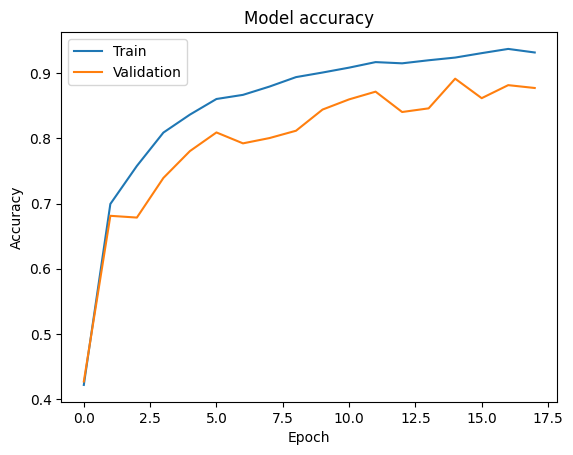

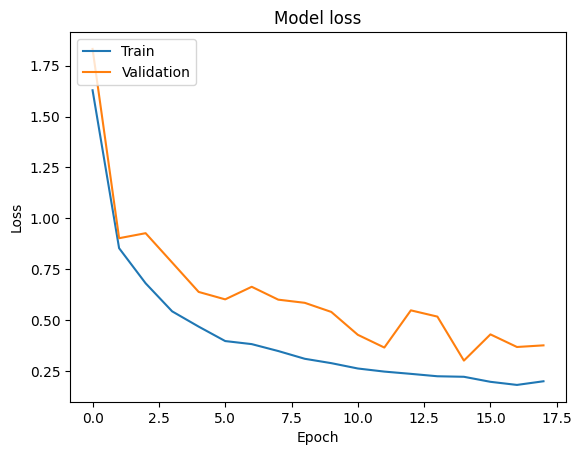

In [ ]:
cnn_plot = plot_training_history(history1)
cnn_plot



Both training and validation accuracy increase rapidly during the early epochs, suggesting that the model is learning effectively from the training data.

Both training and validation loss decrease during the early epochs, indicating that the model is learning to make better predictions.

The training accuracy consistently sits above the validation accuracy, indicating that the model is overfitting to the training data. it's memorizing the training examples rather than learning generalizable patterns.

After around epoch 10, both curves start to plateau, suggesting that the model's learning has slowed down significantly.


**VGG19 MODEL ACCURACY**

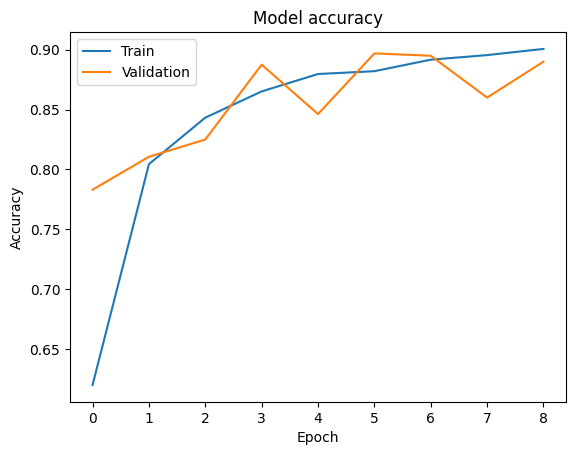

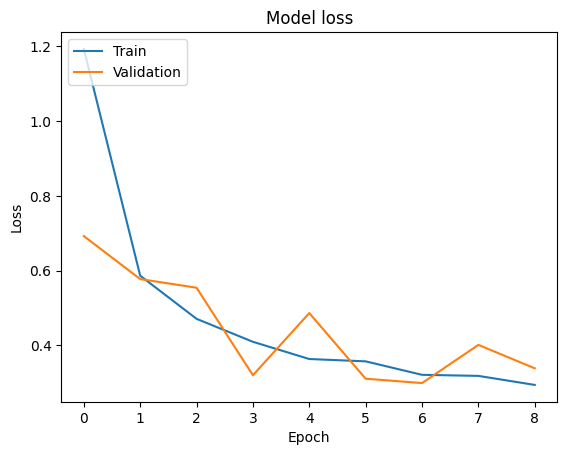

In [ ]:
vgg19_plot = plot_training_history(history2)
vgg19_plot

The model's accuracy on both training and validation data increases initially, which is expected as the model learns from the data.However, the accuracy starts to plateau around epoch 5, and there's a noticeable gap between the training and validation accuracy indicating that the model might be overfitting to the training data.

Both training and validation loss decrease initially, which is a good sign but then validation loss starts to increase after epoch 4, while the training loss continues to decrease


**RESNET50 MODEL ACCURACY**

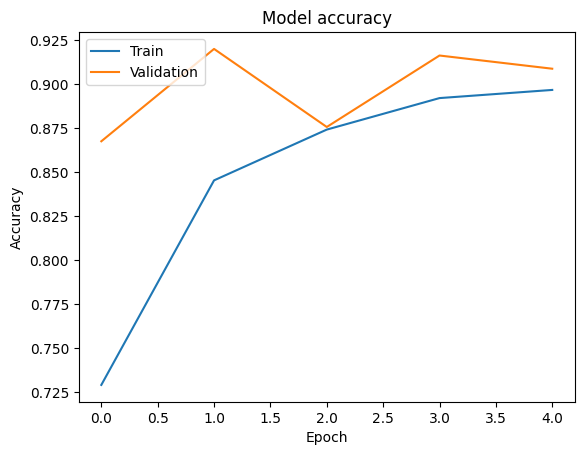

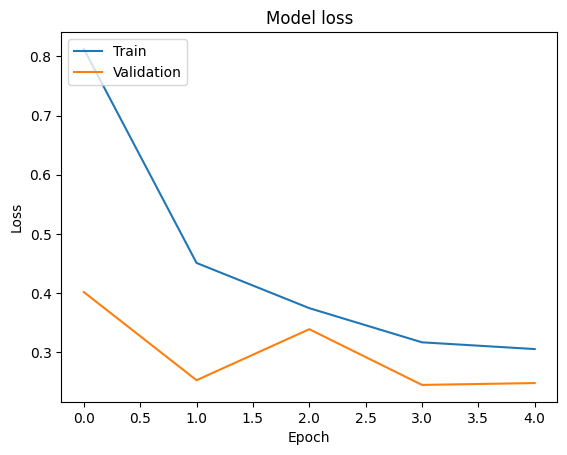

In [ ]:
resnet50_plot = plot_training_history(history3)
resnet50_plot

The training accuracy increases steadily from around 72.5% to around 88% over the 5 epochs indicating that the model is learning from the training data and improving its performance over time.

The validation accuracy starts high, increases, and then slightly fluctuates but generally trends around 90%.This suggests that the model initially performs well on unseen data and maintains good performance, with minor fluctuations possibly due to data variability.

The training loss decreases consistently from around 0.75 to around 0.25 over the epochs indicating that the model is learning to reduce errors on the training data.

The validation loss starts lower than the training loss and fluctuates but shows a general downward trend suggesting that the model performs well on the validation set


**EFFICIENTNETB0 MODEL ACCURACY**

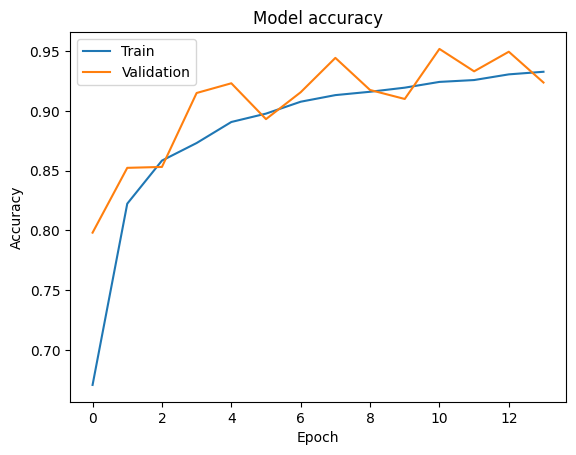

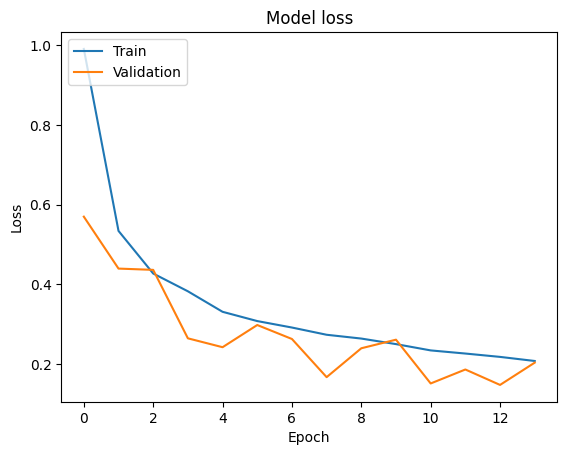

In [ ]:
efficientnet_plot = plot_training_history(history4)
efficientnet_plot

The training accuracy starts lower and increases steadily, approaching around 93% indicating consistent learning and improvement. Validation accuracy initially increases and then fluctuates around the training accuracy, generally trending upward.

Training loss starts high and decreases steadily, approaching around 0.2, showing the model is reducing errors during training

Validation loss starts high, drops rapidly, then fluctuates before stabilizing around 0.2.The initial rapid drop indicates quick learning, followed by fine-tuning.

The similar trends in both training and validation metrics suggest the model is not overfitting, as validation performance closely follows training performance.

**MOBILENET V2 MODEL ACCURACY**

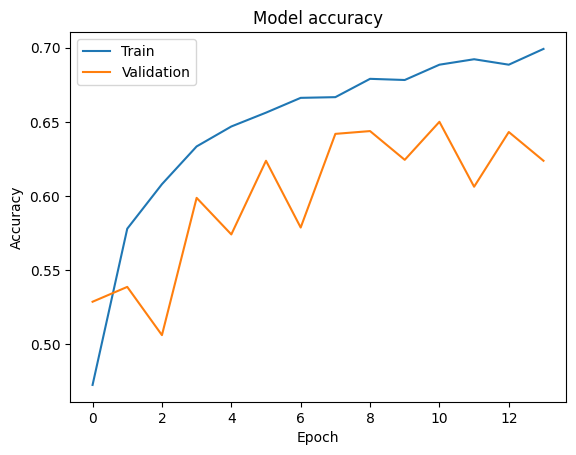

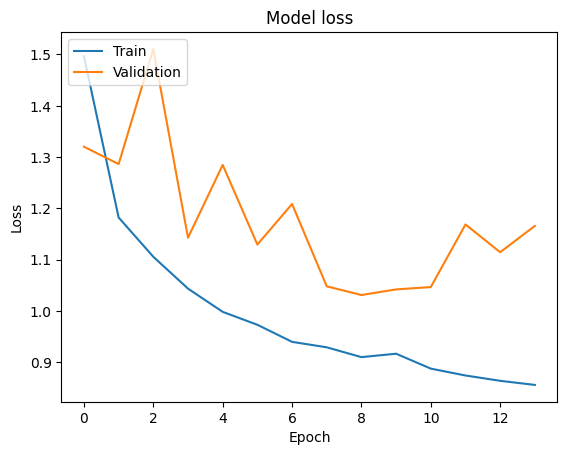

In [ ]:
mobilenet_plot = plot_training_history(history5)
mobilenet_plot

 The model seems to be learning and improving its performance on the training data. However, the validation accuracy and loss suggest that the model might be overfitting to the training data and not generalizing well to new data.

# **HYPERPARAMETER TUNING**

**Model 1: CNN Tuning**

We used a tool called Weights & Biases (wandb) to track the training of CNN and REsnet50  models which had the highest accuracies and generate reports

 Wandb visualizes the results of different hyperparameter combinations to identify which configuration leads to the best validation accuracy.

In [ ]:
# prompt: hyperparameter the cnn model using wandb
#import SGD
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
# Initialize wandb
!wandb login

# Define the sweep configuration
sweep_config = {
    'method': 'random',
    'metric': {
        'name': 'val_accuracy',
        'goal': 'maximize'
    },
    'parameters': {
        'epochs': {
            'values': [10, 20, 30]
        },
        'batch_size': {
            'values': [16, 32, 64]
        },
        'learning_rate': {
            'distribution': 'log_uniform_values',
            'min': 1e-4,
            'max': 1e-2
        },
        'optimizer': {
            'values': ['adam', 'sgd']
        },
        'dropout': {
            'values': [0.2, 0.3, 0.4, 0.5]
        },
    }
}

# Create a sweep
sweep_id = wandb.sweep(sweep_config, project='plant-disease-detection-cnn')

# Define the training function for the sweep
def train_cnn():
    with wandb.init():
        config = wandb.config

        # Define the model
        model = models.Sequential([
            resize_and_rescale,
            layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(32, 256, 256, 3)),
            layers.MaxPooling2D((2, 2)),
            layers.Dropout(config.dropout),
            layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
            layers.MaxPooling2D((2, 2)),
            layers.Dropout(config.dropout),
            layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
            layers.MaxPooling2D((2, 2)),
            layers.Dropout(config.dropout),
            layers.Conv2D(64, (3, 3), activation='relu'),
            layers.MaxPooling2D((2, 2)),
            layers.Dropout(config.dropout),
            layers.Conv2D(128, (3, 3), activation='relu'),
            layers.MaxPooling2D((2, 2)),
            layers.Dropout(config.dropout),
            layers.Flatten(),
            layers.Dense(64, activation='relu'),
            layers.Dense(len(class_names), activation='softmax'),
        ])

        # Compile the model
        if config.optimizer == 'adam':
            optimizer = tf.keras.optimizers.Adam(learning_rate=config.learning_rate)
        else:
            optimizer = tf.keras.optimizers.SGD(learning_rate=config.learning_rate)

        model.compile(
            optimizer=optimizer,
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )

        # Train the model
        history6 = model.fit(
            train_set,
            batch_size=config.batch_size,
            validation_data=val_set,
            verbose=1,
            epochs=config.epochs,
            callbacks=[WandbCallback()]
        )

# Run the sweep
wandb.agent(sweep_id, train_cnn)


wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
Create sweep with ID: 9aojeeop
Sweep URL: https://wandb.ai/dianaolulo0-n-a/plant-disease-detection-cnn/sweeps/9aojeeop


wandb: Agent Starting Run: sp4dooj0 with config:
wandb: 	batch_size: 64
wandb: 	dropout: 0.3
wandb: 	epochs: 30
wandb: 	learning_rate: 0.0018827544893683529
wandb: 	optimizer: adam
wandb: Currently logged in as: dianaolulo0 (dianaolulo0-n-a). Use `wandb login --relogin` to force relogin


wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/30
400/400 [==============================] - ETA: 0s - loss: 1.7286 - accuracy: 0.3849

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240801_102047-sp4dooj0/files/model-best)... Done. 0.0s


400/400 [==============================] - 319s 596ms/step - loss: 1.7286 - accuracy: 0.3849 - val_loss: 1.6160 - val_accuracy: 0.4450
Epoch 2/30
400/400 [==============================] - ETA: 0s - loss: 1.1826 - accuracy: 0.5876

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240801_102047-sp4dooj0/files/model-best)... Done. 0.0s


400/400 [==============================] - 259s 582ms/step - loss: 1.1826 - accuracy: 0.5876 - val_loss: 0.9370 - val_accuracy: 0.6731
Epoch 3/30
400/400 [==============================] - ETA: 0s - loss: 0.8562 - accuracy: 0.7033

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240801_102047-sp4dooj0/files/model-best)... Done. 0.0s


400/400 [==============================] - 256s 576ms/step - loss: 0.8562 - accuracy: 0.7033 - val_loss: 0.7512 - val_accuracy: 0.7350
Epoch 4/30
400/400 [==============================] - 254s 571ms/step - loss: 0.6471 - accuracy: 0.7746 - val_loss: 1.0902 - val_accuracy: 0.6187
Epoch 5/30
400/400 [==============================] - 256s 579ms/step - loss: 0.5560 - accuracy: 0.8073 - val_loss: 0.7659 - val_accuracy: 0.7306
Epoch 6/30
400/400 [==============================] - 260s 588ms/step - loss: 0.4783 - accuracy: 0.8332 - val_loss: 0.7837 - val_accuracy: 0.7387
Epoch 7/30
400/400 [==============================] - 254s 568ms/step - loss: 0.4342 - accuracy: 0.8484 - val_loss: 0.7677 - val_accuracy: 0.7362
Epoch 8/30
400/400 [==============================] - ETA: 0s - loss: 0.4057 - accuracy: 0.8577

wandb: Ctrl + C detected. Stopping sweep.


**Model 3 :ResNet50 Tuning**

In [ ]:
# Initialize a new W&B run
wandb.init(
    project='tomato_disease_detection',
    config={
        'img_size': (256,256),
        'batch_size': 32,
        'epochs': 50,
        'architecture': 'ResNet50',
        'dropout': 0.25,
        'dense_units': 256,
        'optimizer': 'Adam',
        'loss': 'categorical_crossentropy',
        'metrics': ['accuracy'],
        'learning_rate': 0.001,

    }
)



# Create and train the model
# Create a new model
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the base model
base_model.trainable = False
# # Create a new model
model_restune2 = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(wandb.config.dense_units, activation='relu'),
    layers.Dropout(wandb.config.dropout),
    layers.Dense(len(class_names), activation='softmax')
])

# Compile the model
# You need to compile the model before training
model_restune2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=wandb.config.learning_rate),
    loss=wandb.config.loss,
    metrics=wandb.config.metrics
)

# Initialize the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with W&B callback
history_restune2= model_restune2.fit(
    train_set,
    validation_data=val_set,
    epochs=50,
    callbacks=[early_stopping, WandbCallback()]
)

# Finish the W&B run
wandb.finish()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/50
402/402 [==============================] - ETA: 0s - loss: 0.5866 - accuracy: 0.8015

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240802_225619-3br89n19/files/model-best)... Done. 0.3s


402/402 [==============================] - 408s 948ms/step - loss: 0.5866 - accuracy: 0.8015 - val_loss: 0.3628 - val_accuracy: 0.8763
Epoch 2/50
402/402 [==============================] - ETA: 0s - loss: 0.3021 - accuracy: 0.8990

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240802_225619-3br89n19/files/model-best)... Done. 0.4s


402/402 [==============================] - 405s 945ms/step - loss: 0.3021 - accuracy: 0.8990 - val_loss: 0.2670 - val_accuracy: 0.9031
Epoch 3/50
402/402 [==============================] - 387s 906ms/step - loss: 0.2551 - accuracy: 0.9115 - val_loss: 0.3422 - val_accuracy: 0.8831
Epoch 4/50
402/402 [==============================] - 392s 918ms/step - loss: 0.2182 - accuracy: 0.9237 - val_loss: 0.3317 - val_accuracy: 0.8950
Epoch 5/50
402/402 [==============================] - ETA: 0s - loss: 0.2042 - accuracy: 0.9289

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240802_225619-3br89n19/files/model-best)... Done. 0.3s


402/402 [==============================] - 408s 952ms/step - loss: 0.2042 - accuracy: 0.9289 - val_loss: 0.2060 - val_accuracy: 0.9331
Epoch 6/50
402/402 [==============================] - ETA: 0s - loss: 0.1904 - accuracy: 0.9351

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240802_225619-3br89n19/files/model-best)... Done. 0.3s


402/402 [==============================] - 410s 955ms/step - loss: 0.1904 - accuracy: 0.9351 - val_loss: 0.1882 - val_accuracy: 0.9306
Epoch 7/50
402/402 [==============================] - 390s 912ms/step - loss: 0.1691 - accuracy: 0.9409 - val_loss: 0.2108 - val_accuracy: 0.9244
Epoch 8/50
402/402 [==============================] - ETA: 0s - loss: 0.1699 - accuracy: 0.9425

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240802_225619-3br89n19/files/model-best)... Done. 0.3s


402/402 [==============================] - 416s 970ms/step - loss: 0.1699 - accuracy: 0.9425 - val_loss: 0.1541 - val_accuracy: 0.9513
Epoch 9/50
402/402 [==============================] - ETA: 0s - loss: 0.1619 - accuracy: 0.9444

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240802_225619-3br89n19/files/model-best)... Done. 0.4s


402/402 [==============================] - 415s 967ms/step - loss: 0.1619 - accuracy: 0.9444 - val_loss: 0.1254 - val_accuracy: 0.9544
Epoch 10/50
402/402 [==============================] - 383s 895ms/step - loss: 0.1469 - accuracy: 0.9486 - val_loss: 0.2214 - val_accuracy: 0.9187
Epoch 11/50
402/402 [==============================] - 401s 934ms/step - loss: 0.1434 - accuracy: 0.9501 - val_loss: 0.3074 - val_accuracy: 0.9000
Epoch 12/50
402/402 [==============================] - 385s 894ms/step - loss: 0.1349 - accuracy: 0.9535 - val_loss: 0.2292 - val_accuracy: 0.9206


The model achieved an accuracy of 95.35% on the training data by the end of the training process.The best performance was observed at epoch 8.The lowest validation loss achieved was 0.12536, indicating the best model performance on the validation set.The loss on the training data at the end of the 11 epochs was 0.13489.

It achieved a validation accuracy of 92.06% at the end of the training and a validation loss of 0.22916.The model showed strong performance with high accuracy and relatively low loss values.



In [ ]:
with open('history_restune2.json','w') as f:
  json.dump(history_restune2.history,f)

In [ ]:
model_restune2.save('model_restune2.h5')

**Model 4: EfficientNet Tuning**

In [ ]:
# Initialize WandB
wandb.init(project="Tomato disease detention")

# Define a function to create the model
def create_model(learning_rate, dropout_rate):
    efficientnet_base = efn.EfficientNetB0(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
    efficientnet_base.trainable = False

    model_efftuned = models.Sequential([
        layers.experimental.preprocessing.Rescaling(1./255, input_shape=(256, 256, 3)),
        efficientnet_base,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(len(class_names), activation='softmax')
    ])

    model_efftuned.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model_efftuned

# Define sweep configuration
sweep_config = {
    'method': 'bayes',
    'metric': {
        'name': 'val_accuracy',
        'goal': 'maximize'
    },
    'parameters': {
        'learning_rate': {
            'values': [0.001, 0.0001, 0.00001]
        },
        'dropout_rate': {
            'values': [0.2, 0.3, 0.4]
        },
        'batch_size': {
            'values': [16, 32, 64]
        }
    }
}

sweep_id = wandb.sweep(sweep_config, project="efficient net tuning")

# Define sweep function
def sweep_train(config=None):
    with wandb.init(config=config):
        config = wandb.config

        model = create_model(config.learning_rate, config.dropout_rate)

        history_efftuned = model.fit(
            train_set,
            batch_size=config.batch_size,
            validation_data=val_set,
            verbose=1,
            epochs=50,
            callbacks=[WandbCallback(), early_stopping]
        )

        test_loss, test_acc = model_efftuned.evaluate(test_set)
        wandb.log({'test_loss': test_loss, 'test_accuracy': test_acc})

# Start sweep
wandb.agent(sweep_id, function=sweep_train, count=10)

In [ ]:
with open('history_efftuned.json','w') as f:
  json.dump(history_efftuned.history,f)

In [ ]:
model_efftuned.save('model_efftuned.h5')

# **MODEL EVALUATION AFTER TUNING**

**Evaluating Tuned ResNet50**

In [ ]:
#Load saved resnet results
loaded_restune2= tf.keras.models.load_model('model_restune2.h5')

In [ ]:
test_loss, test_acc = loaded_restune2.evaluate(test_set, verbose=2)
print('\nTest accuracy for Resnet:', test_acc)

51/51 - 66s - loss: 0.2278 - accuracy: 0.9258 - 66s/epoch - 1s/step

Test accuracy for CNN: 0.9258123636245728


**Evaluating Tuned EfficientNetB0**

In [ ]:
#Load saved efficient net results
loaded_efftuned= tf.keras.models.load_model('model_efftuned.h5')

In [ ]:
test_loss, test_acc = loaded_efftuned.evaluate(test_set, verbose=2)
print('\nTest accuracy for EfficientNet:', test_acc)

# **PLOTTING THE TRAINING HISTORY AFTER TUNING**

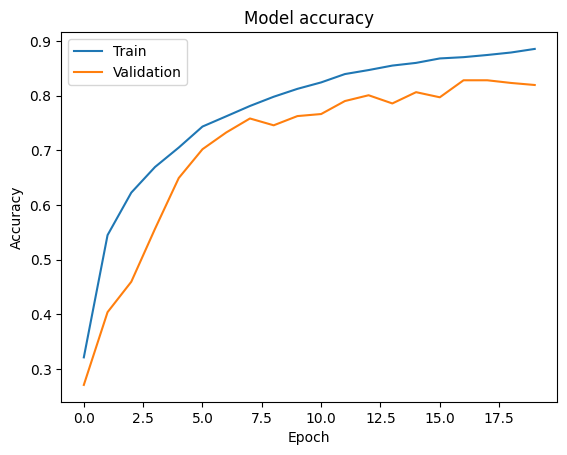

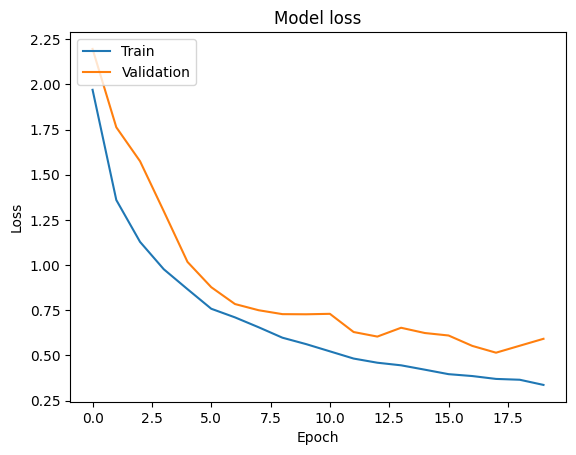

In [ ]:
restune_plot = plot_training_history(history_fine)
restune_plot

The Train accuracy shows a steady increase in accuracy as the number of epochs progresses. It starts relatively low and gradually climbs towards a plateau around epoch 15.

The Validation accuracy also shows an upward trend, but with more fluctuations. It generally follows the training accuracy but with a slight gap

The model appears to be learning effectively from the training data, as seen by the increasing accuracy and decreasing loss during training.

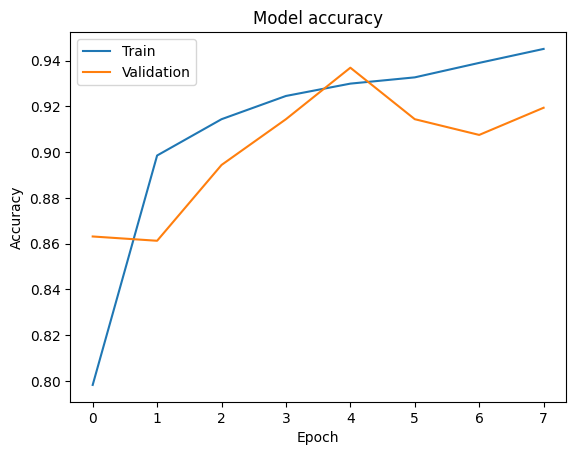

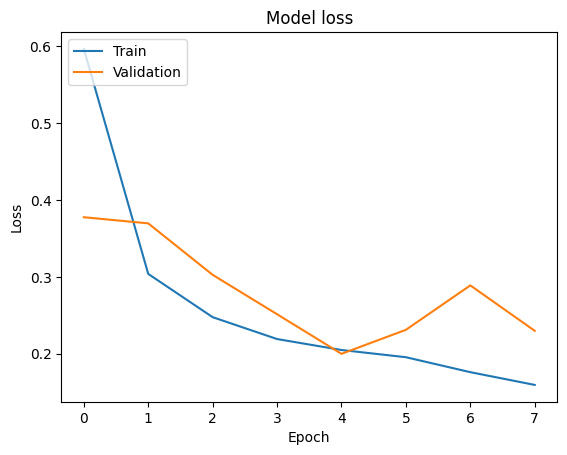

In [ ]:
# Load training history from JSON file
model_path = '/content/drive/MyDrive/tomato_saved_models/history_restune2.json'
with open(model_path, 'r') as f:
    history_restune2 = json.load(f)


restune2_plot = plot_training_history(history_restune2)
restune2_plot

**Observations**

The training accuracy starts at around 0.80 and steadily increases, reaching its peak at the end of the training period with an accuracy of 0.94.

 Validation accuracy starts at around 0.86 but initially increases however, it reaches a plateau around epoch 4 and then slight fluctuations afterwards.

The training loss decreases steadily with no fluctuations from the start till the 7th epoch where it terminates.

The validation loss decrases from  approximately 35% loss and has minimal fluctuations as the models continues to train.


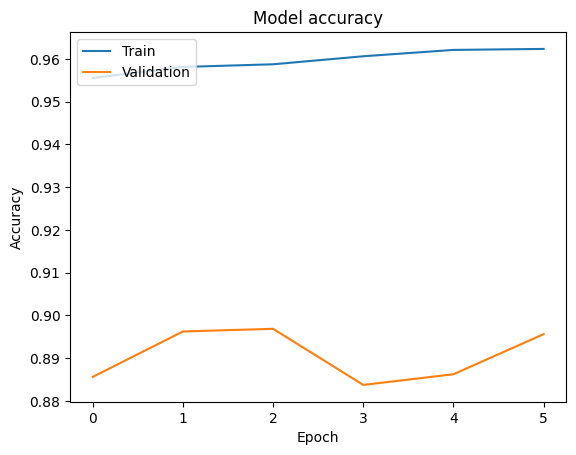

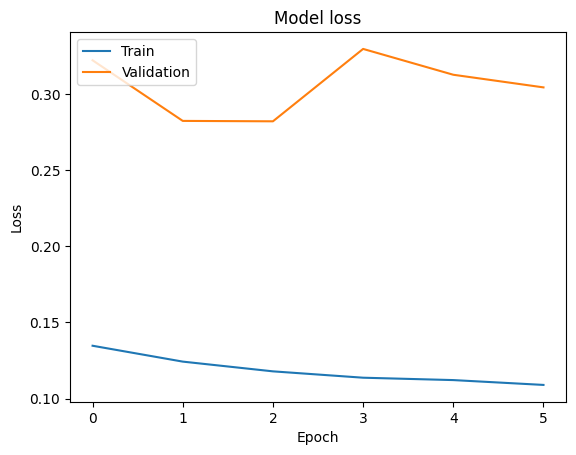

In [ ]:
# plotting training history
# Load the pre-trained model
# Load training history from JSON file
model_path = '/content/drive/MyDrive/tomato_saved_models/history_restune3.json'
with open(model_path, 'r') as f:
    history_restune3 = json.load(f)


restune3_plot = plot_training_history(history_restune3)
restune3_plot


**Observations**

The training accuracy starts high, around 0.95, and gradually increases, reaching close to 0.97 by the sixth epoch.

The validation accuracy starts at around 0.89, increases slightly by the second epoch, and then fluctuates, showing a decrease before a slight increase towards the last epoch.

The training loss starts around 0.15 and consistently decreases, reaching close to 0.10 by the sixth epoch.
This indicates that the model is effectively minimizing the loss on the training data

The validation loss starts at around 0.30, decreases slightly by the second epoch, but then increases, peaking at the fourth epoch before slightly decreasing again.
The validation loss is higher than the training loss and shows a fluctuating pattern.

# **MODEL SELECTION**

Resnet50 is the best performing model , initially saved  as 'model3_inital.h5'.The selection of this model was validated throught its superior performance with the highest accuracy of 94% and least loss of 16% on test data. This means the model is able to perform well in plant disease detection with very minimal errors of  approximately 16%.

**MODEL PREDICTION USING RESNET50 SAVED MODEL**

Next we use the best model to make predictions using the test data

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 87ms/step


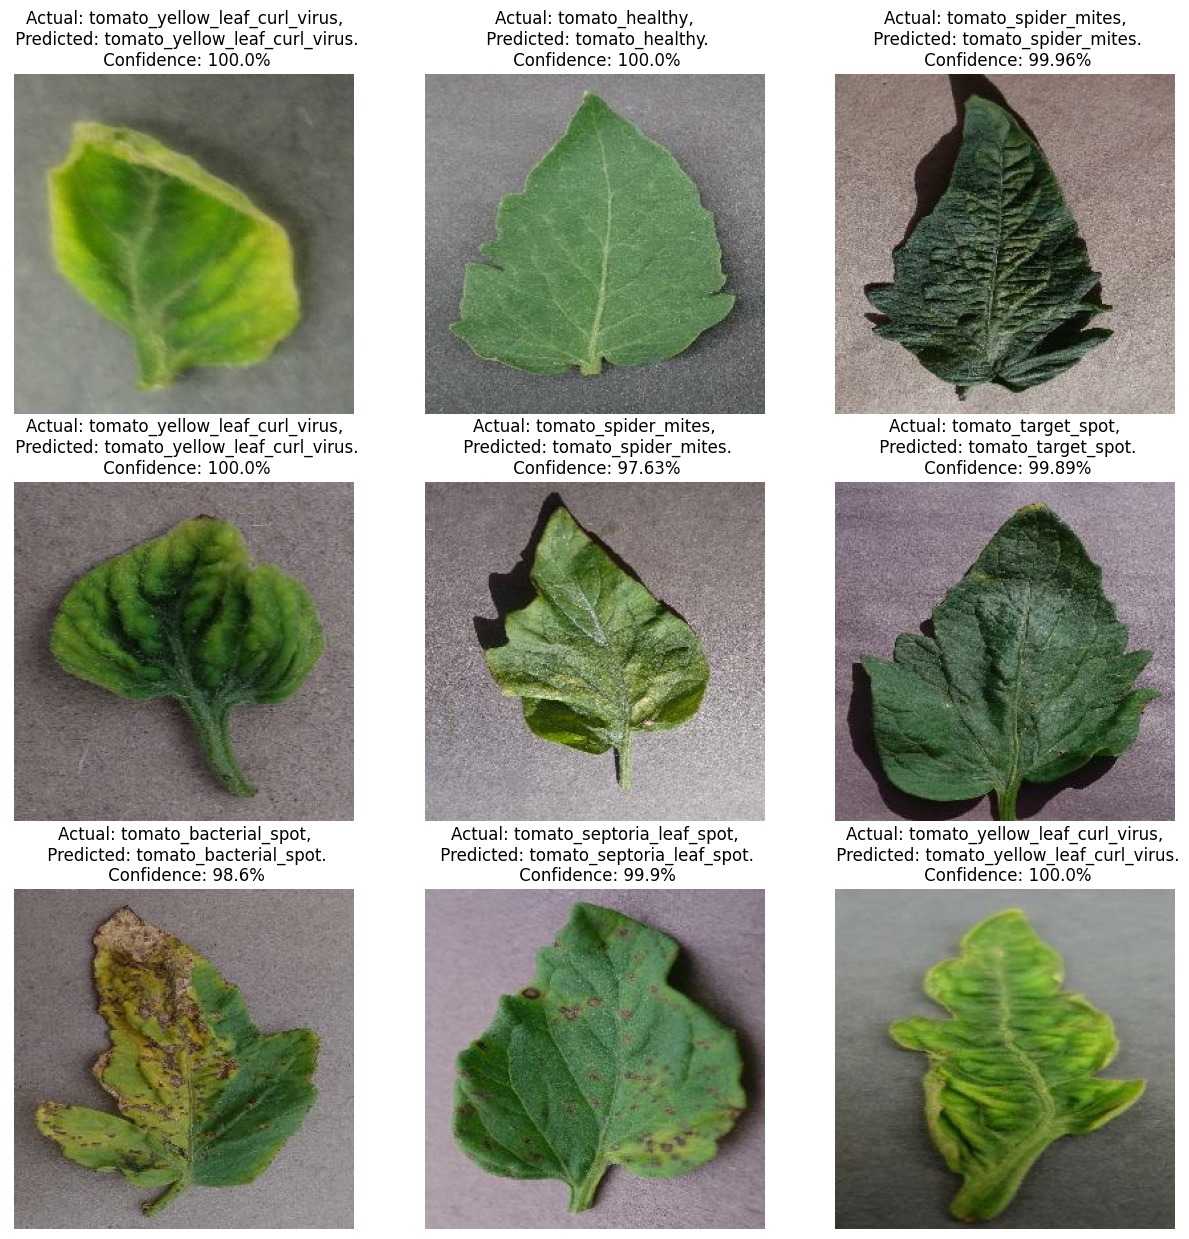

In [ ]:

plt.figure(figsize=(15, 15))
model_path = '/content/drive/MyDrive/tomato_saved_models/model3_initial.h5'
model = tf.keras.models.load_model(model_path)
for images, labels in test_set.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())

        # Convert the one-hot encoded label to an integer index
        actual_class_index = tf.argmax(labels[i]).numpy()
        actual_class = class_names[actual_class_index]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

The Resnet50 model demonstrates high accuracy for several classes, particularly tomato_yellow_leaf_curl_virus and tomato_healthy.

The confidence levels for most predictions are high, indicating the model's certainty in its classifications.

**PREDICTION USING A RANDOM IMAGE FROM THE INTERNET**

Loaded a random image from the internet to see the resnet model prediction capabilities

In [ ]:
# prompt: predict image path

img_path='./tomato_late_blight.jpeg'#loading a random image for prdecition using the the best model
image = tf.keras.preprocessing.image.load_img(img_path, target_size=(256, 256))
img_array = tf.keras.preprocessing.image.img_to_array(image)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
predicted_class = class_names[np.argmax(predictions[0])]
confidence = round(100 * (np.max(predictions[0])), 2)

print(f"Predicted: {predicted_class}.\n Confidence: {confidence}%")


1/1 [==============================] - 0s 84ms/step
Predicted: tomato_late_blight.
 Confidence: 100.0%


<Figure size 1500x1500 with 0 Axes>

The model correctly predicted the image as tomato_late_blight with 100% confidence.